In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


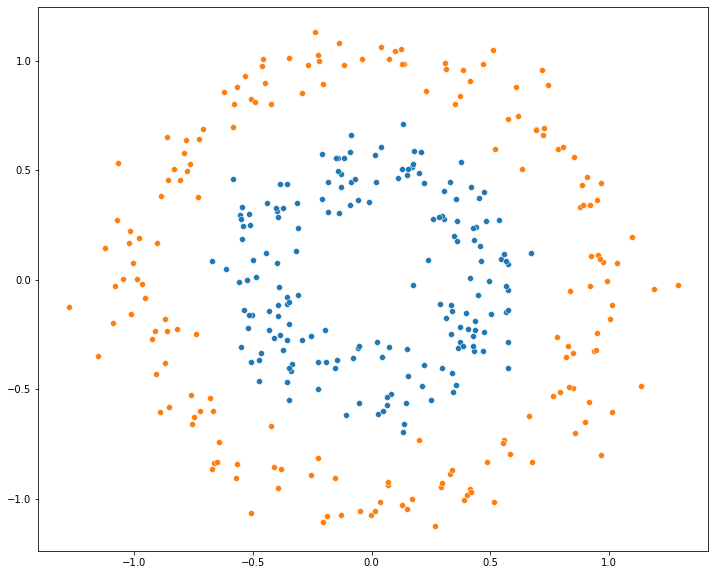

In [ ]:
(x_train,y)=datasets.make_circles(n_samples=350,factor=.5,noise=.1)
y[y==0]=-1
pos=x_train[y==1]
neg=x_train[y==-1]
fig=plt.figure(figsize=(12,10))
sb.scatterplot(pos[:,0],pos[:,1])
sb.scatterplot(neg[:,0],neg[:,1])

In [ ]:
alpha=tf.Variable(tf.random.normal(shape=[1,350]))
gamma=tf.constant(-50.0)
optimizer = tf.keras.optimizers.SGD(0.001)
y = np.reshape(y,newshape=[-1,1]).astype('float32')

In [ ]:
#kernal function
@tf.function
def rbf_kernel(euclid_dist):
  return tf.exp(tf.multiply(gamma,euclid_dist))

#loss function
@tf.function
def loss():
  dist=tf.reduce_sum(tf.square(x_train),axis=1)
  dist = tf.reshape(dist,[-1,1])
  #euclidian dist between every pair of sample
  sq_dist = (dist-2*tf.matmul(x_train,tf.transpose(x_train)))+tf.transpose(dist)
  float_dist = tf.cast(sq_dist,tf.float32)

  term1 = tf.reduce_sum(alpha)

  #alpha(langrangian multiplier) sqaure
  alpha_sq=tf.matmul(tf.transpose(alpha),alpha)
  #y^2 = y^T * y
  y_sq = tf.matmul(y,tf.transpose(y))

  term2 = tf.reduce_sum(tf.multiply(rbf_kernel(float_dist),tf.multiply(alpha_sq,y_sq)))

  #main loss term
  cost = tf.negative(tf.subtract(term1,term2))
  return cost

for ep in range(2000):
  optimizer.minimize(loss,[alpha])
  if ep%250==0:
    ls = loss()
    tf.print("\r{}".format(ls), end='')

-16.366926193237305

In [ ]:
def prediction(points):
  x_sq = tf.reshape(tf.reduce_sum(x_train**2,1),[-1,1])
  x_prime_sq = tf.reshape(tf.reduce_sum(points**2,1),[-1,1])
  sq_dist=tf.add(tf.subtract(x_sq, tf.multiply(2,tf.matmul(x_train,tf.transpose(points)))),tf.transpose(x_prime_sq))
  sq_dist=tf.cast(sq_dist,tf.float32)
  kernel = tf.exp(tf.multiply(gamma,tf.abs(sq_dist)))
  output = tf.matmul(tf.multiply(tf.transpose(y),alpha),kernel)
  return tf.sign(output - tf.reduce_mean(output))

x1_min,x1_max = x_train[:,0].min()-1, x_train[:,0].max()+1
x2_min,x2_max = x_train[:,1].min()-1, x_train[:,1].max()+1

x1,x2=np.meshgrid(np.arange(x1_min,x1_max,0.02), np.arange(x2_min,x2_max,0.02))
points=np.c_[x1.ravel(), x2.ravel()]
predictions = prediction(points)
predictions = np.reshape(predictions,x1.shape)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


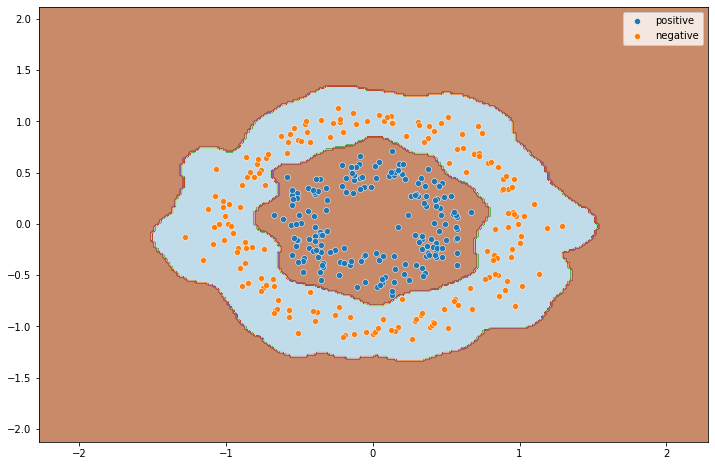

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.contourf(x1,x2,predictions,cmap=plt.cm.Paired,alpha=0.7)
sb.scatterplot(pos[:,0],pos[:,1],label='positive')
sb.scatterplot(neg[:,0],neg[:,1],label='negative')